# First let's import, then look for the assignment below

In [17]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.LangDef   import *  #-- mainly for nthnumeric
from jove.Def_md2mc import *  #-- for md2mc
from jove.Def_DFA   import *  #-- for all DFA functions
from jove.DotBashers import * #-- for dotObj_dfa
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Task 1: Define DFA Even010

<font size="4">    
Using Jove's markdown, define a DFA for the language of strings over alphabet $\{0,1\}$ that accepts an even number of NON-OVERLAPPING occurrences of $010$s. Thoroughly document your construction!
    
HERE ARE EXAMPLES :

* 01010 - does NOT have an even number of 0's because we wanted NON-OVERLAPPING

* 0101010 - has two NON-OVERLAPPING occurrences of 010 -- that is what we want!

* 0101111010 - has two NON-OVERLAPPING occurrences of 010

* 111111 - has ZERO occurrences of 010
    
</font>

### Hint: Name states to remember the essence of the history of inputs so far. If you do so, and also keep the sense of where the machine is (in an I state, an IF state or an F state), then you'll have the solution fall out automatically!

Please read the Jove_User_Manual and heed the advice given there regarding how to write your automaton markdowns, how to place comments, how to group the lines of a DFA per state, and how to order which transition you may first consider.


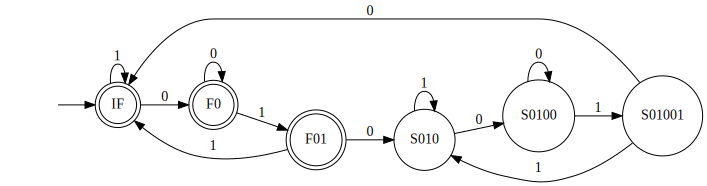

In [18]:
Even010 = md2mc('''
DFA 

!! Put comments describing overall plan here

  IF : 1 -> IF
  IF : 0 -> F0
  F0 : 0 -> F0
  F0 : 1 -> F01
  F01 : 1 -> IF
  F01 : 0 -> S010
  S010 : 1 -> S010
  S010 : 0 -> S0100
  S0100 : 0 -> S0100
  S0100 : 1 -> S01001
  S01001 : 1 -> S010
  S01001 : 0 -> IF
 
''')

dotObj_dfa(Even010)

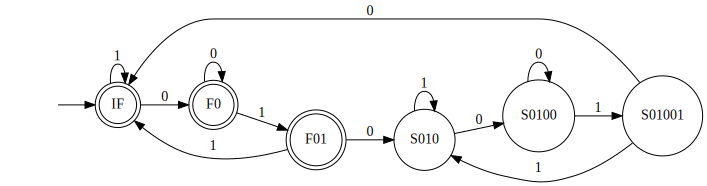

In [19]:
dotObj_dfa(Even010)

# Task 2: Define DFA Ends010

<font size="4">    
3. Using Jove's markdown, define a DFA for the language of strings over alphabet $\{0,1\}$ that ends in a $010$, calling it Ends010. Then obtain the intersection with the Even010 machine using intersect_dfa. 
    
    Call the intersection Even010_Ends010.
    
    Next, minimize Even010_Ends010, storing it in min_Even010_Ends010 .
    
    Again, document the construction thoroughly.
    
</font>

### Hint: Define a machine for "ends $010$" as illustrated by DFA Even010, and negate.

In [20]:
Ends010 =  md2mc('''
DFA

!! Again, follow the commenting plans and write the "DFA code" in neat bunches

  I : 1 -> I
  I : 0 -> S0
  S0 : 0 -> S0
  S0 : 1 -> S01
  S01 : 1 -> I
  S01 : 0 -> F010
  F010 : 0 -> S0
  F010 : 1 -> S01

''')

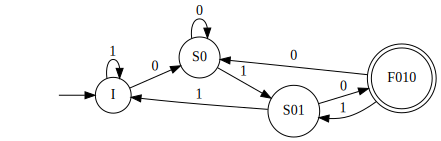

In [21]:
# Let's see the "Ends010" machine
dotObj_dfa(Ends010, FuseEdges=True)

## Obtain the intersection of Even010 and Ends010

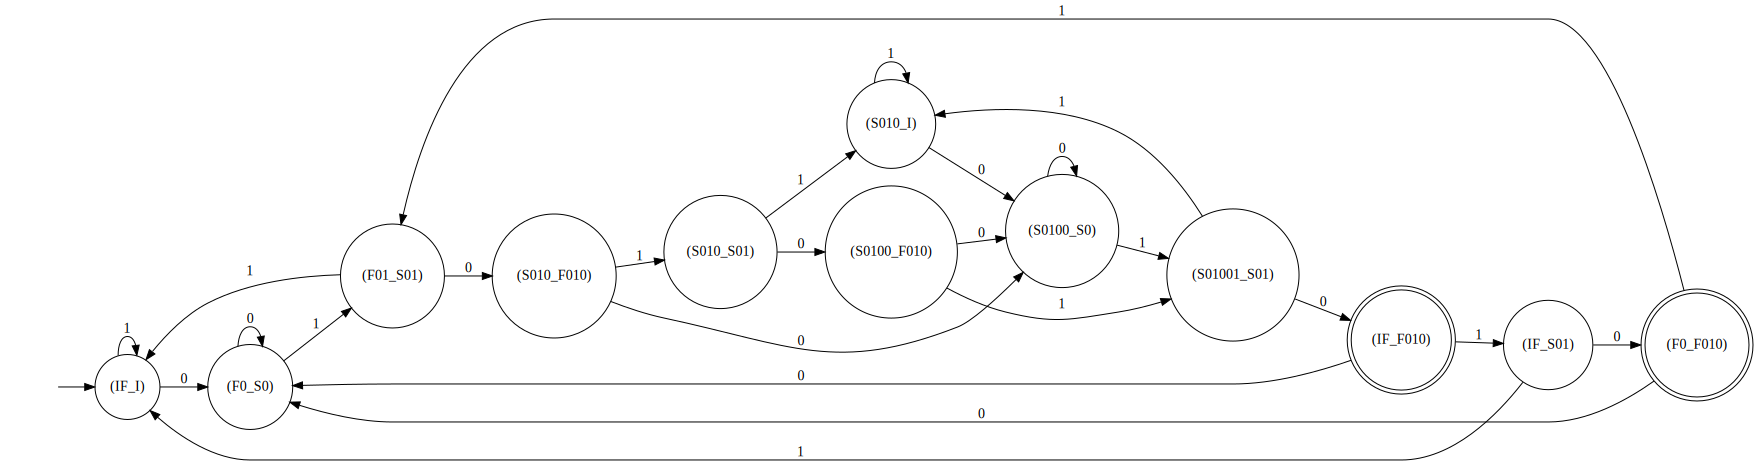

In [22]:
Even010_Ends010 = intersect_dfa(Even010, Ends010)
dotObj_dfa(Even010_Ends010)

## Minimize the intersection of Even010 and Ends010

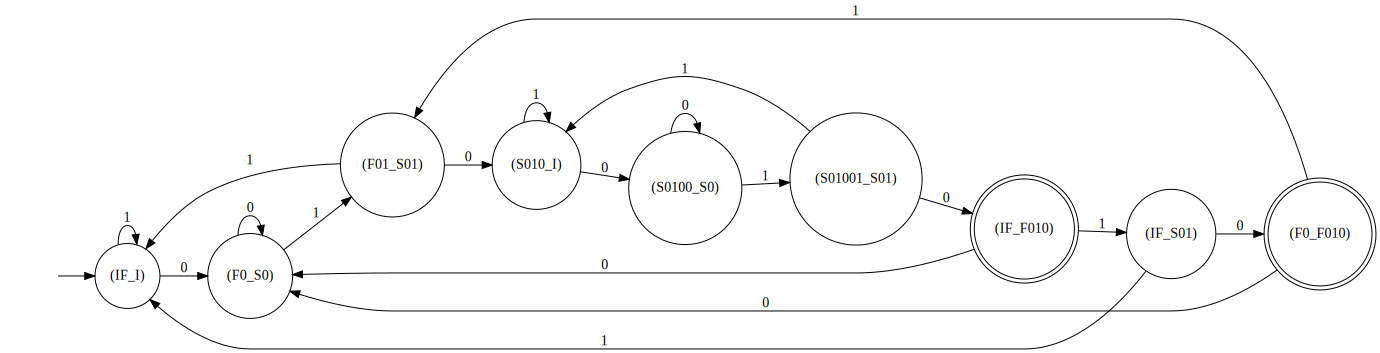

In [23]:
min_Even010_Ends010 = min_dfa(Even010_Ends010)
dotObj_dfa(min_Even010_Ends010)

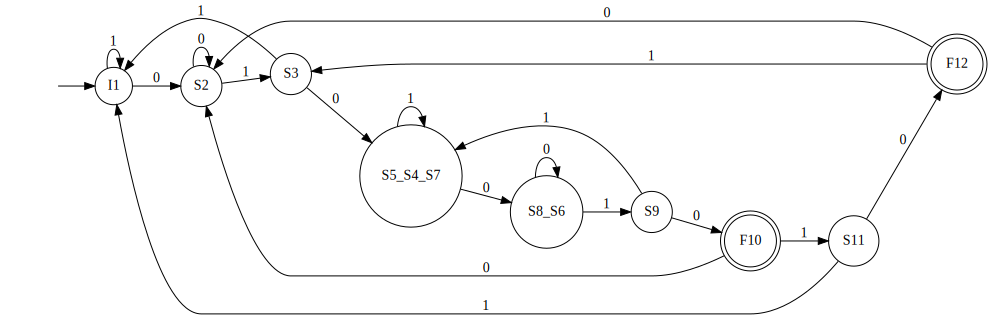

In [24]:
verboseMin = min_dfa(md2mc('''
DFA

!! Again, follow the commenting plans and write the "DFA code" in neat bunches
!! I1 maps to IF_I
!! S2 maps to F0_S0
!! S3 maps to F01_S01
!! S4 maps to S010_F010
!! S5 maps to S010_S01
!! S6 maps to S0100_F010
!! S7 maps to S010_I
!! S8 maps to S0100_S0
!! S9 maps to S01001_S01
!! F10 maps to IF_F010
!! S11 maps to IF_S01
!! F12 maps to F0_F010

  I1 : 1 -> I1
  I1 : 0 -> S2
  S2 : 0 -> S2
  S2 : 1 -> S3
  S3 : 1 -> I1
  S3 : 0 -> S4
  S4 : 1 -> S5
  S4 : 0 -> S8
  S5 : 0 -> S6
  S5 : 1 -> S7
  S6 : 0 -> S8
  S6 : 1 -> S9
  S7 : 1 -> S7
  S7 : 0 -> S8
  S8 : 0 -> S8
  S8 : 1 -> S9
  S9 : 1 -> S7
  S9 : 0 -> F10
  F10 : 0 -> S2
  F10 : 1 -> S11
  S11 : 1 -> I1
  S11 : 0 -> F12
  F12 : 0 -> S2
  F12 : 1 -> S3

'''), state_name_mode='verbose')

dotObj_dfa(verboseMin)

# Task 3: Examine Why Minimization Implies Elimination
<font size="4">    
    
Find out which states were eliminated in the Minimization Process. Explain why it was OK to leave these states out. Test the constructed machine using the template given to you. Finally use the Python "filter" function that filters out the accepted strings.
    
</font>

## Find out which states were eliminated

In [25]:
# Hint: You can obtain the components of a DFA D by using the notation D["Q"] where
# D is a DFA created using the md2mc command. Basically, "D" is a dictionary and 
# D["Q"] obtains the value of the key at "Q". See the lecture slides for Lec-3.
Even010_Ends010["Q"] - min_Even010_Ends010["Q"]

{('S010', 'F010'), ('S010', 'S01'), ('S0100', 'F010')}

## Explain why it is OK to leave these states out

A template to guide your answer is below.

<font size="4"> 
... Your explanations here - a template of your answer is as follows ...
    
**This template tries to limit the number of cases you have to list**
 
 
 * I find that state SOMESTATE1 is present in DFA1 but SOMESTATE1 is absent in DFA2 
 
 
   - I can obtain this info by doing DFA1["Q"] - DFA2["Q"]
   - I can also eye-ball the diagrams and spot the missing state
   - But I recall that in the diagram, a state may show up P_Q while in the DFA1["Q"] - DFA2["Q"] printout, it may show up as ('P','Q')
 
 
 
 * If there are multiple *SOMESTATE1* that are missing in DFA2, please pick the one that involves state letter 'I'  and call that the *SOMESTATE1* for the remaining questions BELOW
 
 
 **IMPORTANT CHANGE:** __Due to some non-reproducibility lurking in Jove, some people may not get a state containing "I". In that case, pick any one state that is missing, and answer the remaining questions.__
 
 * But I find that THIS STRING (pick the shortest string in numeric order) that reached SOMESTATE1 in DFA1 is now reaching state SOMESTATE2 in DFA2
 
 * Thus I conclude that state SOMESTATE1 and SOMESTATE2 are equivalent
 
 * This is further confirmed by the fact that (**here I am limiting your checks to 3 cases**)
   - upon 0, SOMESTATE1 goes to THIS STATE while SOMESTATE2 goes to THIS STATE and they are  BOTH ACCEPTING / BOTH NON-ACCEPTING (pick on)
   - upon 1, SOMESTATE1 goes to THIS STATE while SOMESTATE2 goes to THIS STATE and they are  BOTH ACCEPTING / BOTH NON-ACCEPTING (pick on)
   upon 01, SOMESTATE1 goes to THIS STATE while SOMESTATE2 goes to THIS STATE and they are  BOTH ACCEPTING / BOTH NON-ACCEPTING (pick on)
 
 

 
 
    
</font>

### Answer:

**It seems that states S010_F010 (S4), S010_S01 (S5), and S010_I (S7) are all combined in the minimized DFA.**
+ The equivalence of these states can be shown using the minimization technique outlined in the 03_3 document for this week.
 + Frame 0: S4, S5, and S7 all remain on themselves. They are all fail-states and so the states are not zero-distinguishable.
 + Frame 1: S4 ends on S5 for 0 and S0100_S0 (S8) for 1 which are both fail-states. S5 ends on S0100_F010 (S6) for 0 and S7 for 1. S7 ends on S8 for 0 and itself for 1. Because all these frame-one achievable states are all fail-states (and thus zero-distinguishable), S4, S5, and S7 are not one-distinguishable.
 + Frame 2: S4 ends on S8 for 00, S9 for 01, S6 for 10, and S7 for 11 which are all fail-states. S5 ends on S8 for 00, S9 for 01, S8 for 10, and S7 for 11. S7 ends on S8 for 00, S9 for 01, S8 for 01, and itself for 11. Of these frame-two achievable states, only S9 is one-distinguishable. In this case, for the string ‘0’ which gives a final-state. However, S4, S5, and S7 all achieve S9 through the same string ‘01’, and so they are still not two-distinguishable.

<br>


**The states S0100_F010 (S6) and 0100_S0 (S8) are also combined**
+ The equivalence of these states can be shown using the minimization technique outlined in the 03_3 document for this week.
 + Frame 0: Both S6 and S8 are non-final states, and are thus not zero-distinguishable.
 + Frame 1: S6 gives S8 for 0 and S9 for 1. S8 gives itself for 0 and S9 for 1. All these frame-one achievable states are non-final, thus not zero-distinguishable, thus S6 and S8 are not one-distinguishable.
 + Frame 2: S6 gives S8 for 00, S9 for 01, IF_F010 (F10) for 10, and S7 for 11. S8 gives itself for 00, S9 for 01, F10 for 10, and S7 for 11. Two of these frame-one achievable states could lead to a final state. S9 which is one-distinguishable from the non-final states, and F10 which is zero-distinguishable from the non-final states. However, both S6 and S8 reach these states through the same strings (‘01’ for S9 and ‘10’ for F10). So S6 and S8 are still not two-distinguishable.

# Testing the machine

In [26]:
help(nthnumeric)

Help on function nthnumeric in module jove.LangDef:

nthnumeric(N, S=['a', 'b'])
    Assume S ('Sigma') is a 2-sized list of chars (default ['a','b']). 
    Produce the Nth string in numeric order, where N >= 0.
    Idea : Given N, get b = floor(log_2(N+1)) - need that 
    many places; what to fill in the places is the binary 
    code for N - (2^b - 1) with 0 as S[0] and 1 as S[1].



## Test the constructed machine the "direct" way

In [27]:
TestList = [ nthnumeric(i, ['0','1']) for i in range(256) ]

In [28]:
TestList

['',
 '0',
 '1',
 '00',
 '01',
 '10',
 '11',
 '000',
 '001',
 '010',
 '011',
 '100',
 '101',
 '110',
 '111',
 '0000',
 '0001',
 '0010',
 '0011',
 '0100',
 '0101',
 '0110',
 '0111',
 '1000',
 '1001',
 '1010',
 '1011',
 '1100',
 '1101',
 '1110',
 '1111',
 '00000',
 '00001',
 '00010',
 '00011',
 '00100',
 '00101',
 '00110',
 '00111',
 '01000',
 '01001',
 '01010',
 '01011',
 '01100',
 '01101',
 '01110',
 '01111',
 '10000',
 '10001',
 '10010',
 '10011',
 '10100',
 '10101',
 '10110',
 '10111',
 '11000',
 '11001',
 '11010',
 '11011',
 '11100',
 '11101',
 '11110',
 '11111',
 '000000',
 '000001',
 '000010',
 '000011',
 '000100',
 '000101',
 '000110',
 '000111',
 '001000',
 '001001',
 '001010',
 '001011',
 '001100',
 '001101',
 '001110',
 '001111',
 '010000',
 '010001',
 '010010',
 '010011',
 '010100',
 '010101',
 '010110',
 '010111',
 '011000',
 '011001',
 '011010',
 '011011',
 '011100',
 '011101',
 '011110',
 '011111',
 '100000',
 '100001',
 '100010',
 '100011',
 '100100',
 '100101',
 '100110'

In [29]:
help(accepts_dfa)

Help on function accepts_dfa in module jove.Def_DFA:

accepts_dfa(D, s)
    In : D (consistent DFA)
         s (string over D's sigma, including "")
    Out: Boolean (if state after s-run is in D's final).



In [30]:
for test in TestList:
    if accepts_dfa(min_Even010_Ends010, test):
        print(" min_Even010_Ends010 : accepts ", test)
    else:
        print(" min_Even010_Ends010 : does not accept ", test)

 min_Even010_Ends010 : does not accept  
 min_Even010_Ends010 : does not accept  0
 min_Even010_Ends010 : does not accept  1
 min_Even010_Ends010 : does not accept  00
 min_Even010_Ends010 : does not accept  01
 min_Even010_Ends010 : does not accept  10
 min_Even010_Ends010 : does not accept  11
 min_Even010_Ends010 : does not accept  000
 min_Even010_Ends010 : does not accept  001
 min_Even010_Ends010 : does not accept  010
 min_Even010_Ends010 : does not accept  011
 min_Even010_Ends010 : does not accept  100
 min_Even010_Ends010 : does not accept  101
 min_Even010_Ends010 : does not accept  110
 min_Even010_Ends010 : does not accept  111
 min_Even010_Ends010 : does not accept  0000
 min_Even010_Ends010 : does not accept  0001
 min_Even010_Ends010 : does not accept  0010
 min_Even010_Ends010 : does not accept  0011
 min_Even010_Ends010 : does not accept  0100
 min_Even010_Ends010 : does not accept  0101
 min_Even010_Ends010 : does not accept  0110
 min_Even010_Ends010 : does not acce

## Use Python's "filter" function to filter out the accepted strings directly

In [31]:
list(filter(lambda x: accepts_dfa(min_Even010_Ends010, x), TestList))

['010010', '0010010', '0100010', '0101010', '1010010']

## Doubled the testing range; now finding at least ten strings!

In [32]:
list(filter(lambda x: accepts_dfa(min_Even010_Ends010, x), [ nthnumeric(i, ['0','1']) for i in range(512) ]))

['010010',
 '0010010',
 '0100010',
 '0101010',
 '1010010',
 '00010010',
 '00100010',
 '00101010',
 '01000010',
 '01001010',
 '01010010',
 '01011010',
 '10010010',
 '10100010',
 '10101010',
 '11010010']

# END